#1. Introduction


##1.1 Background
As a Master student in last semester, I am applying for jobs and am curious to know

1- How the hiring pocess works and which factors are most important for the candidates to be called for an inteview.

2- Can a machine learning model be developed that can accurately predict whether a person would be called for an interview on the basis of some features?

This project can help me explore the answers to  these questions.


##1.2 Objectives
Following are the objectives of this project

1- To find out what factors/features are important for a candidate/applicant to be called for an interview.

2- To explore whether a machine learning model can accurately predict whether a person would be called for an interview based on the important features identified in the exploration of the first objective.

# 2. Data Exploration


## 2.1 Data Collection
I have taken the data from the Kaggel and the link to to the dataset is given as [HR Competency Scores for Screening](https://www.kaggle.com/datasets/muhammadjawwadismail/hr-competency-scores-for-screening). This dataset is selected because it is a good fit for achieving the objective of the project. The number of features in the data are rather diverse and the number of observations are sufficient for exploring the questions of the project which are mentioned in the background section.

The first step for this project is to load the relavent libraries.

In [ ]:
# Importing python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We read the dataset and then print the first five rows to observe data, the features and their type.

In [ ]:
# Read and diaplay the first five rows of the dataset
df = pd.read_csv('dataset.csv')
df.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


All the values are given in the normalized form.

In [ ]:
# Print the names of all the features in the dataset
features_names = []
for col in df.columns:
  print(col)

years_of_experience
functional_competency_score
top1_skills_score
top2_skills_score
top3_skills_score
behavior_competency_score
top1_behavior_skill_score
top2_behavior_skill_score
top3_behavior_skill_score
call_for_interview


In [ ]:
# Check the dimensions of the dataset
df.shape

(300, 10)

So, we have total 300 observations and 10 features. Overall, the data is numerical but the call for interview, the target variable, is categorical. The decision to call the candidate for interview is shown by 1, and not to be called by 0.

## 2.2 Data Visualisation
We will plot a box plot for the features in the dataset to see and analyze how they are distributed.

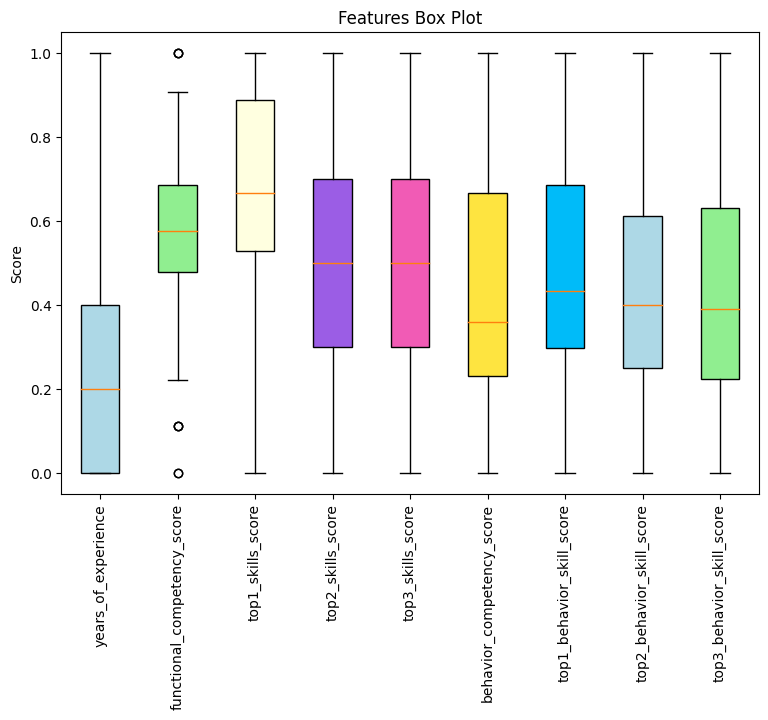

In [ ]:

color_codes = ['lightblue', 'lightgreen', 'lightyellow', '#9b5de5', '#f15bb5', '#fee440', '#00bbf9',
              'lightblue', 'lightgreen']

# Draw the graphs for all the features except response variable
features_to_plot = df.drop('call_for_interview', axis = 1)

# Create the axes and figure of the graph
fig, ax = plt.subplots(figsize=(9, 6))
boxplot = ax.boxplot(features_to_plot, patch_artist=True)

# Change the fill color of the boxes
for patch, color in zip(boxplot['boxes'], color_codes[0:9]):
    patch.set_facecolor(color)

# Add labels to the graph and show the plot
ax.set_ylabel('Score')
ax.set_title('Features Box Plot')
ax.set_xticklabels(features_to_plot)
plt.xticks(rotation=90)
plt.show()


The top1_skills_score has the largest median among all the features, while the years_of_experience have the lowest median. The top2_skills_score and top3_skills_score have almost same median score. The behavior competency score and top three behavior skills have almost same median. Moreover, only the functional competency score has outliers.

Now to see the percentages of the students called for interiew, we will plot the bar plot.

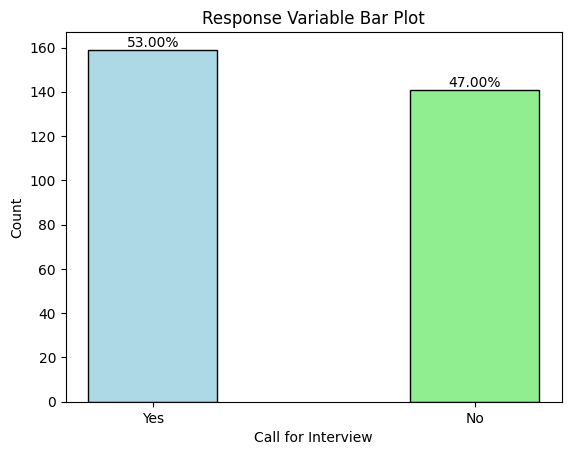

In [ ]:

# Call_for_interview should be yes or no
labels = ['Yes', 'No']
values = df['call_for_interview'].value_counts()

# Find the percetages for the yes and no
total = sum(values)
percentages = [(value/total) * 100 for value in values]

# Add percentage labels to the bars
for i, value in enumerate(values):
    percentage = f'{percentages[i]:.2f}%'
    plt.text(i, value, percentage, ha='center', va='bottom')

# Plotting the bar chart and the labels
plt.bar(labels, values, color = color_codes[0:2], align='center', width=0.4, edgecolor='black', linewidth=1)
plt.xlabel('Call for Interview')
plt.ylabel('Count')
plt.title('Response Variable Bar Plot')
plt.show()


#3. Data Preparation
After data exploration and visualization, the next step is to prepare the data for analysis and for training the model. For this we need to do preprocessing of the data which address issues such as missing values, outliers, encoding of variables and feature selection/engineering.

##3.1 Data Transfromation
Since computer deal only with numbers, therefore data transfromation is needed when the dataset contains non-numeric data, such as categorical variables or text. In our dataset all the features have numerical values, even the catagorical variable call_for_interview (Yes, No) is given as numeric variable (1, 0) respectively. Therefore, transformation is not required.

##3.2 Data Cleaning:
To clean our data, we will:
* Remove duplicates rows if there is any.
* Check and handle missing values in the dataset.
* Examine the data types of each column and ensure they are correctly assigned.

In [ ]:
# Check if there are any missing values
# Sum them up for each column

df.isna().sum()

years_of_experience            0
functional_competency_score    0
top1_skills_score              0
top2_skills_score              0
top3_skills_score              0
behavior_competency_score      0
top1_behavior_skill_score      0
top2_behavior_skill_score      0
top3_behavior_skill_score      0
call_for_interview             0
dtype: int64

The result of the code chunk above shows there are no missing values in the columns.

Now, we need to check if there are duplicate observations in the dataframe and sum them up to get the total number of duplicated rows.

In [ ]:
# This will check the duplicate observations in the dataset

df.duplicated().sum()

0

Hence, the total observations are uniqe and there no duplication of observations.

Next we need to check the data types of our features.

In [ ]:
# Check the data types of each columns in df.
df.dtypes

years_of_experience            float64
functional_competency_score    float64
top1_skills_score              float64
top2_skills_score              float64
top3_skills_score              float64
behavior_competency_score      float64
top1_behavior_skill_score      float64
top2_behavior_skill_score      float64
top3_behavior_skill_score      float64
call_for_interview               int64
dtype: object

It is clear that all the data types are correctly assigned and there is no need for any correction.

As discussed earlier, there are outliers in the functional competancy score that needs to be removed.

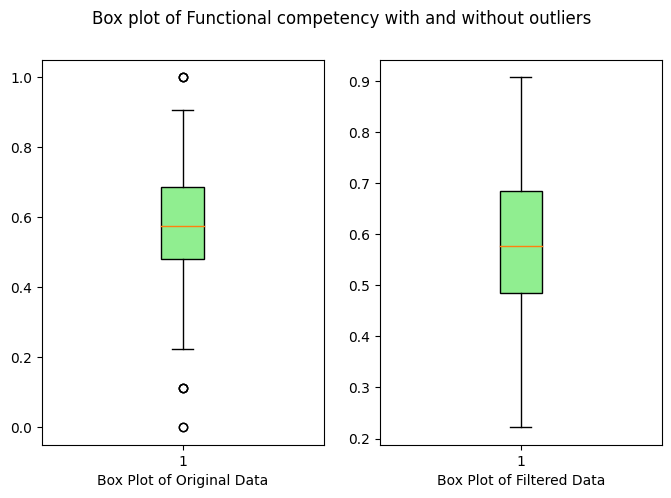

In [ ]:
data_to_plot = df['functional_competency_score']
# Identify outliers by inter quartile range
q1 = np.percentile(data_to_plot , 25)
q3 = np.percentile(data_to_plot , 75)
iqr = q3 - q1
threshold = 1.5 * iqr
outliers = (data_to_plot  < q1 - threshold) | (data_to_plot  > q3 + threshold)


# Visualize original and filtered data side by side
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 5)
fig.suptitle('Box plot of Functional competency with and without outliers')

# Plot original data
ax1.boxplot(data_to_plot, patch_artist=True, boxprops = {'facecolor' : color_codes[1]})
ax1.set_xlabel("Box Plot of Original Data")

# Remove outliers from the functional comptency columns
filtered_data = data_to_plot [~outliers]


# Plot the filtered data
ax2.boxplot(filtered_data, patch_artist=True, boxprops = {'facecolor' : color_codes[1]})
ax2.set_xlabel("Box Plot of Filtered Data")
plt.show()


# Remove outliers from the dataset
df = df[~outliers]


## 3.3 Features Selection

When it comes to feature selection, understanding the correlation between variables is key. When two variables are highly correlated, they tend to change together in a predictable manner. Therfore, we will drop those features  to avoid redunduncy and improve the model's performance.

In [ ]:
# Print the names of all the features in dataset

for col in df.columns:
  print(col)

years_of_experience
functional_competency_score
top1_skills_score
top2_skills_score
top3_skills_score
behavior_competency_score
top1_behavior_skill_score
top2_behavior_skill_score
top3_behavior_skill_score
call_for_interview


Now we have to plot the correlation of all the features including response variable to check which features are correlated loosely or strongly with it, so only high correlated features are selected for the model building. Plus, they also shows which features are important in deciding whether an applicant would be called for an interview or not. Thus, giving an answer to our first question and objective of this project.

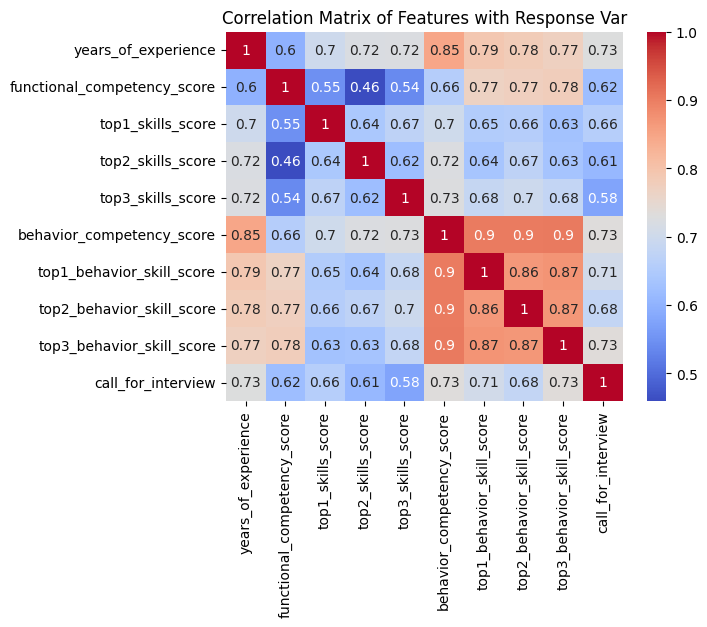

In [ ]:
# Create a heatmap with the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# Set the plot title
plt.title('Correlation Matrix of Features with Response Var')

# Show the plot
plt.show()

Follwoing are the observations of the correlation matrix:

1. Years of experience and behavior competency score are highly  correlated with response variable.
2. Years of experience is also highly correlated with behavior competency scores.


Next, we will drop the features which are highly correlated with each other. For this I have set the threshold value for correlation coefficient greater than 0.85.

In [ ]:
# Identify highly correlated features
corr_matrix = df.drop("call_for_interview", axis = 1)
corr_matrix = corr_matrix.corr()
# Set threshold
corr_threshold = 0.85
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            high_corr_features.add(colname_i)
            high_corr_features.add(colname_j)

In [ ]:
high_corr_features

{'behavior_competency_score',
 'top1_behavior_skill_score',
 'top2_behavior_skill_score',
 'top3_behavior_skill_score'}

The above features are highly correlated with each other and have correlation coefficient more that 0.85. Therefore, we will drop three and choose one of them. Sicne the behavior competency has the highest correlation with call of interview, therefore we will keep it.

In [ ]:
# Drop the mentioned columns fromthe dataset
df= df.drop(['top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score'],  axis = 1)

In [ ]:
# Confirm the data
df.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,1


#4. Model training
I have used nine classification models for training and I will choose one of them based on the evaluation metrics.

In [ ]:

# Importing sklearn libraries for model training and evaluation metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score


# Different classification Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


As our response variable is a decision variable, hence assign features columns to X and decision variable to y. Also, split the dataset into training data (80%) and testing data (20%).

In [ ]:
# Split the data into train and test model
X = df.drop("call_for_interview", axis = 1)
y = df["call_for_interview"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Next, we train the model with different classifiers on the training dataset. Moreover, we test the trained classifiers on the test dataset.

To choose the best model among the trained models, we will use the f1 score, accuracy, and log loss.

In [ ]:
# Define the list of models
models = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]


# Logging for Visual Comparison
log_cols = ["Classifier", "Accuracy", "Log Loss", "F1 Score"]
log = pd.DataFrame(columns=log_cols)

for model in models:
    name = model.__class__.__name__
    print("*" * 40)
    print(name)

    # Perform cross-validation
    train_predictions = cross_val_predict(model, X_train, y_train, cv=5)

    # Calculate and print the evaluation metrics
    precision = precision_score(y_train, train_predictions, average="macro")
    recall = recall_score(y_train, train_predictions, average="macro")
    f1 = f1_score(y_train, train_predictions, average="macro")
    ppv = precision_score(y_train, train_predictions, average=None)
    npv = recall_score(y_train, train_predictions, average=None)


    print("==== Training Set Results ====")
    print("Precision: {:.2%}".format(precision))
    print("Recall: {:.2%}".format(recall))
    print("F1 Score: {:.2%}".format(f1))
    print("PPV (Precision):", ppv)
    print("NPV (Recall):", npv)

    # Fit the model on the training set and calculate metrics on the test set
    model.fit(X_train, y_train)

    test_predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_predictions)
    f1_test = f1_score(y_test, test_predictions, average="macro")

    test_predictions_proba = model.predict_proba(X_test)
    my_metric = log_loss(y_test, test_predictions_proba)

    log_entry = pd.DataFrame([[name, accuracy * 100, my_metric, f1_test]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

# Print the results
print("*" * 40)
print("Testing Results for each Classifier:")
print(log)


****************************************
KNeighborsClassifier
==== Training Set Results ====
Precision: 91.15%
Recall: 90.81%
F1 Score: 90.55%
PPV (Precision): [0.8515625  0.97142857]
NPV (Recall): [0.97321429 0.84297521]
****************************************
SVC
==== Training Set Results ====
Precision: 91.23%
Recall: 90.46%
F1 Score: 90.10%
PPV (Precision): [0.83458647 0.99      ]
NPV (Recall): [0.99107143 0.81818182]
****************************************
NuSVC
==== Training Set Results ====
Precision: 91.23%
Recall: 90.46%
F1 Score: 90.10%
PPV (Precision): [0.83458647 0.99      ]
NPV (Recall): [0.99107143 0.81818182]
****************************************
DecisionTreeClassifier
==== Training Set Results ====
Precision: 84.54%
Recall: 84.59%
F1 Score: 84.54%
PPV (Precision): [0.82758621 0.86324786]
NPV (Recall): [0.85714286 0.83471074]
****************************************
RandomForestClassifier
==== Training Set Results ====
Precision: 89.99%
Recall: 89.88%
F1 Score: 89.7

We can see the from the table above that logistic regresion and quadratic discriminant analysis have are the two top models on the bases of slected matrics.


To better summarize the results of the classiffier on the test data, we plot the results table above.

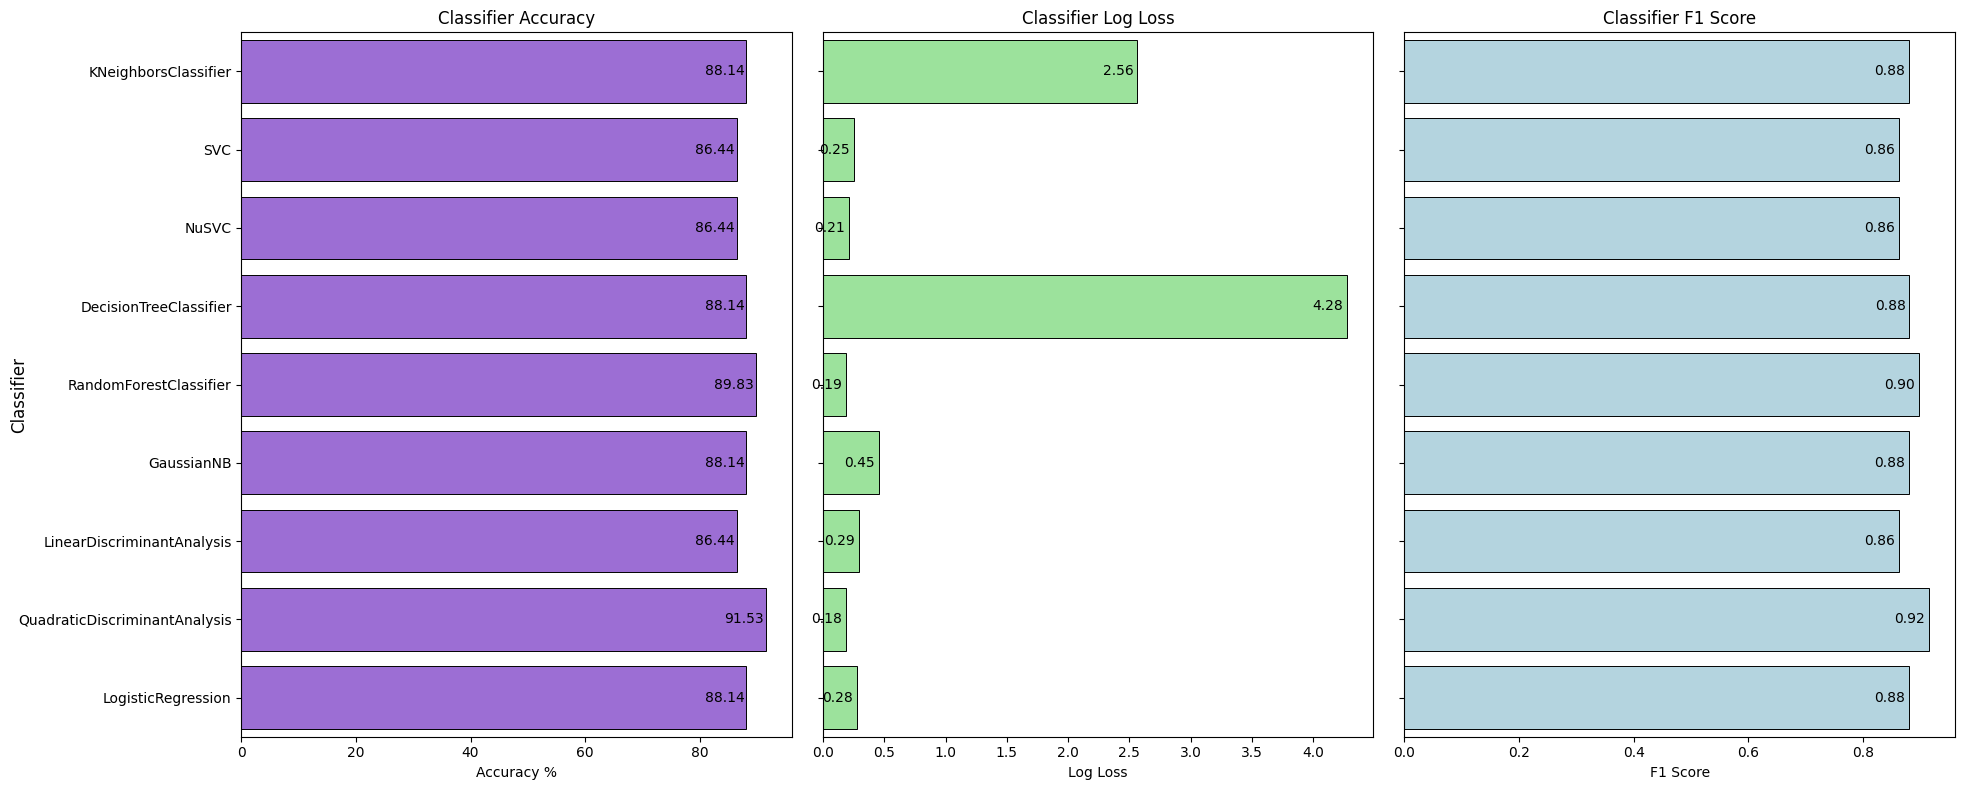

In [ ]:

# Plot the Accuracy, Log Loss, and F1 Score
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 8))

plt.subplot(1, 3, 1)
c = sns.barplot(x='Accuracy', y='Classifier', data=log, color=color_codes[3], edgecolor = 'black', linewidth = 0.7)
c.set(ylabel=None)
c.bar_label(c.containers[0], padding=-30, fmt='%.2f')
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')

plt.subplot(1, 3, 2)
sns.set_color_codes("muted")
l = sns.barplot(x='Log Loss', y='Classifier', data=log, color=color_codes[1], edgecolor = 'black', linewidth = 0.7)
l.set(ylabel=None)
l.bar_label(l.containers[0], padding=-25, fmt='%.2f')
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')

plt.subplot(1, 3, 3)
f = sns.barplot(x='F1 Score', y='Classifier', data=log, color=color_codes[0], edgecolor = 'black', linewidth = 0.7)
f.set(ylabel=None)
f.bar_label(f.containers[0], padding=-25, fmt='%.2f')
plt.xlabel('F1 Score')
plt.title('Classifier F1 Score')

fig.supylabel('Classifier')
plt.tight_layout()
plt.show()


Qudaratic Discriminant Analysis has the highest accuracy, less log loss and highest f1 score. The second highest accurate models models are Logistic Regression, GaussianN and Random Foest based on accuracy, log loss, and f1 score. My model of choice is logistic regression because I want to know which features are important for our prediction model.

For checking which features are most important for the predictin in the model, I trained the logistic regression model agian.




In [ ]:
# Create and fit a logistic regression model

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

Now we calculate the featrures importance and then sort features on the bases of the featrues importance score.



In [ ]:
# Extract feature importance
importances = logreg.coef_[0]
# Sort feature importance scores
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

features = ['years_of_experience', 'functional_competency_score',
       'top1_skills_score', 'top2_skills_score', 'top3_skills_score',
       'behavior_competency_score']
# Convert sorted_indices to a list before indexing features
sorted_features = [features[i] for i in sorted_indices]

In order to show the importance of the featuresand their score, we draw a bar plot for them.

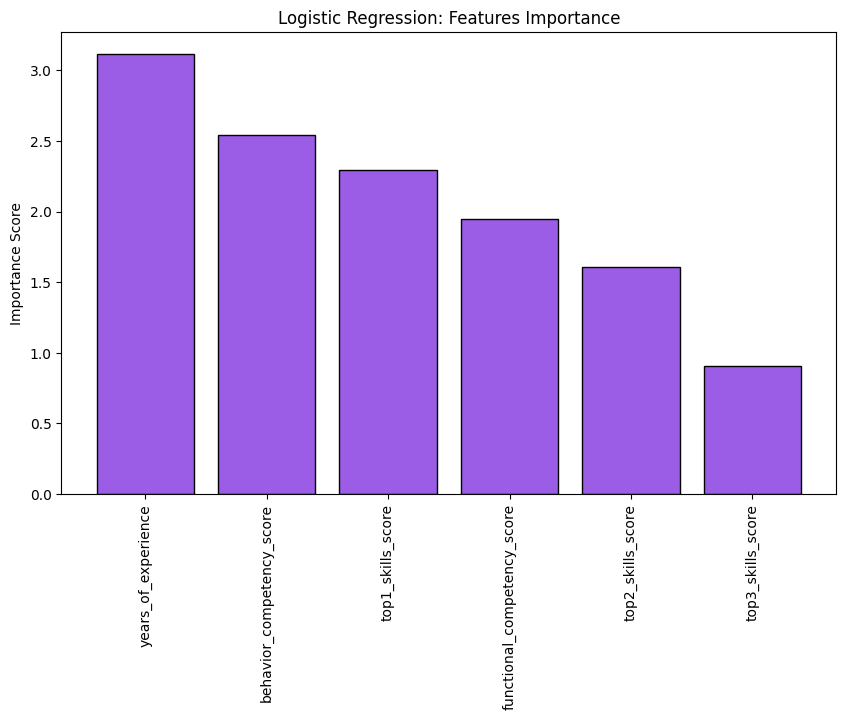

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, color=color_codes[3], edgecolor = 'black')
plt.xticks(range(len(sorted_importances)), sorted_features, rotation='vertical')

plt.ylabel('Importance Score')
plt.title('Logistic Regression: Features Importance')
plt.show()

 The top three most important features are years of experience, behavior competency score, and top1_skills_score. Moreover, the HR gives more importance to top1 skills score than to overall functionall competency score.This make sense, for example, if a company wants C++ developer for job position than they will decide based on how much knowleddge the candidate posses about C++ language than his overall knowledge in the field of computer science.

# 5. Conclusion
The following is the conclusion of this project:

- The top three most important features based on which the HR call a candidate for an interview are years of experience, behavior competency score., and top1_skills_score.
- Logistic regression, a machine learning model, can predict within 90% accuracy wheater a candidate to be called for interview or not.